<h1>Содержание<span class="tocSkip"></span></h1>
<a href="#Подготовка-данных" data-toc-modified-id="Подготовка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Подготовка данных</a></span><ul class="toc-item"><li><span><a href="#Импортируем-необходимые-библиотеки" data-toc-modified-id="Импортируем-необходимые-библиотеки-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Импортируем необходимые библиотеки</a></span><ul class="toc-item"><li><span><a href="#Загрузим-данные" data-toc-modified-id="Загрузим-данные-1.1.1"><span class="toc-item-num">1.1.1&nbsp;&nbsp;</span>Загрузим данные</a></span></li></ul></li><li><span><a href="#Осмотр-данных" data-toc-modified-id="Осмотр-данных-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Осмотр данных</a></span></li><li><span><a href="#Проверка-расчета-эффективности-обогащения" data-toc-modified-id="Проверка-расчета-эффективности-обогащения-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Проверка расчета эффективности обогащения</a></span></li><li><span><a href="#Различия-выборок-и-проверка-на-соответствие" data-toc-modified-id="Различия-выборок-и-проверка-на-соответствие-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Различия выборок и проверка на соответствие</a></span></li><li><span><a href="#Предобработка-даных" data-toc-modified-id="Предобработка-даных-1.5"><span class="toc-item-num">1.5&nbsp;&nbsp;</span>Предобработка даных</a></span><ul class="toc-item"><li><span><a href="#Проверим-данные-на-полные-дубликаты" data-toc-modified-id="Проверим-данные-на-полные-дубликаты-1.5.1"><span class="toc-item-num">1.5.1&nbsp;&nbsp;</span>Проверим данные на полные дубликаты</a></span></li><li><span><a href="#Работа-с-пропусками" data-toc-modified-id="Работа-с-пропусками-1.5.2"><span class="toc-item-num">1.5.2&nbsp;&nbsp;</span>Работа с пропусками</a></span></li></ul></li></ul></li><li><span><a href="#Анализ-данных" data-toc-modified-id="Анализ-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Анализ данных</a></span><ul class="toc-item"><li><span><a href="#Концентрация-металлов-на-разных-стадиях" data-toc-modified-id="Концентрация-металлов-на-разных-стадиях-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Концентрация металлов на разных стадиях</a></span></li><li><span><a href="#Размер-гранул-сырья" data-toc-modified-id="Размер-гранул-сырья-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Размер гранул сырья</a></span></li><li><span><a href="#Суммарные-концентрации-на-разных-стадиях" data-toc-modified-id="Суммарные-концентрации-на-разных-стадиях-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Суммарные концентрации на разных стадиях</a></span></li></ul></li><li><span><a href="#Модель" data-toc-modified-id="Модель-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Модель</a></span></li><li><span><a href="#Чек-лист-готовности-проекта" data-toc-modified-id="Чек-лист-готовности-проекта-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Чек-лист готовности проекта</a></span></li></ul></div>

# Восстановление золота из руды

Подготовьте прототип модели машинного обучения для «Цифры». Компания разрабатывает решения для эффективной работы промышленных предприятий.

Модель должна предсказать коэффициент восстановления золота из золотосодержащей руды. Используйте данные с параметрами добычи и очистки. 

Модель поможет оптимизировать производство, чтобы не запускать предприятие с убыточными характеристиками.

Вам нужно:

1. Подготовить данные;
2. Провести исследовательский анализ данных;
3. Построить и обучить модель.

Чтобы выполнить проект, обращайтесь к библиотекам *pandas*, *matplotlib* и *sklearn.* Вам поможет их документация.

## Подготовка данных

### Импортируем необходимые библиотеки

In [1]:
import pandas as pd
import numpy as np
from sklearn.metrics import mean_absolute_error
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("darkgrid")
from sklearn.model_selection import train_test_split
from imblearn.pipeline import Pipeline
from imblearn import FunctionSampler
from imblearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from feature_engine.selection import DropCorrelatedFeatures
from pyod.models.knn import KNN
from sklearn.dummy import DummyRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

#### Загрузим данные

Из условия задачи индексируем по `date`

In [2]:
gold_rec_train = pd.read_csv('datasets/gold_recovery_train_new.csv', index_col = 'date')
gold_rec_test = pd.read_csv('datasets/gold_recovery_test_new.csv', index_col = 'date')
gold_rec_full = pd.read_csv('datasets/gold_recovery_full_new.csv', index_col = 'date')

### Осмотр данных

Имеем 3 датасета. Чтобы не дублировать код, создадим словарь, элементы которого будем перебирать, иногда будем пользоваться функциями

In [3]:
recovery_data_dict = {
    'train': gold_rec_train,
    'test': gold_rec_test,
    'full': gold_rec_full,
}

Осмотрим данные визуально и с помощью `info`

In [4]:
def display_info(data):
    display(data.head())
    data.info()

In [5]:
for i in recovery_data_dict:
    print('\n ################################################ \n',i)
    display_info(recovery_data_dict[i])


 ################################################ 
 train


,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,primary_cleaner.input.sulfate,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
date,,,,,,,,,,,,,,,,,,,,,
2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,127.092003,...,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,125.629232,...,13.992281,-505.503262,11.950531,-501.331529,10.039245,-500.169983,7.984757,-500.582168,13.998353,-599.787184
2016-01-15 02:00:00,6.055926,10.213995,5.383759,42.657501,68.116445,10.507046,0.953716,16.208849,2.257889,123.819808,...,14.015015,-502.520901,11.912783,-501.133383,10.070913,-500.129135,8.013877,-500.517572,14.028663,-601.427363
2016-01-15 03:00:00,6.047977,9.977019,4.858634,42.689819,68.347543,10.422762,0.883763,16.532835,2.146849,122.270188,...,14.036510,-500.857308,11.999550,-501.193686,9.970366,-499.201640,7.977324,-500.255908,14.005551,-599.996129
2016-01-15 04:00:00,6.148599,10.142511,4.939416,42.774141,66.927016,10.360302,0.792826,16.525686,2.055292,117.988169,...,14.027298,-499.838632,11.953070,-501.053894,9.925709,-501.686727,7.894242,-500.356035,13.996647,-601.496691


<class 'pandas.core.frame.DataFrame'>
Index: 14149 entries, 2016-01-15 00:00:00 to 2018-08-18 10:59:59
Data columns (total 86 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   final.output.concentrate_ag                         14148 non-null  float64
 1   final.output.concentrate_pb                         14148 non-null  float64
 2   final.output.concentrate_sol                        13938 non-null  float64
 3   final.output.concentrate_au                         14149 non-null  float64
 4   final.output.recovery                               14149 non-null  float64
 5   final.output.tail_ag                                14149 non-null  float64
 6   final.output.tail_pb                                14049 non-null  float64
 7   final.output.tail_sol                               14144 non-null  float64
 8   final.output.tail_au                             

,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,primary_cleaner.state.floatbank8_c_level,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
date,,,,,,,,,,,,,,,,,,,,,
2016-09-01 00:59:59,210.800909,14.993118,8.080000,1.005021,1398.981301,-500.225577,1399.144926,-499.919735,1400.102998,-500.704369,...,12.023554,-497.795834,8.016656,-501.289139,7.946562,-432.317850,4.872511,-500.037437,26.705889,-499.709414
2016-09-01 01:59:59,215.392455,14.987471,8.080000,0.990469,1398.777912,-500.057435,1398.055362,-499.778182,1396.151033,-499.240168,...,12.058140,-498.695773,8.130979,-499.634209,7.958270,-525.839648,4.878850,-500.162375,25.019940,-499.819438
2016-09-01 02:59:59,215.259946,12.884934,7.786667,0.996043,1398.493666,-500.868360,1398.860436,-499.764529,1398.075709,-502.151509,...,11.962366,-498.767484,8.096893,-500.827423,8.071056,-500.801673,4.905125,-499.828510,24.994862,-500.622559
2016-09-01 03:59:59,215.336236,12.006805,7.640000,0.863514,1399.618111,-498.863574,1397.440120,-499.211024,1400.129303,-498.355873,...,12.033091,-498.350935,8.074946,-499.474407,7.897085,-500.868509,4.931400,-499.963623,24.948919,-498.709987
2016-09-01 04:59:59,199.099327,10.682530,7.530000,0.805575,1401.268123,-500.808305,1398.128818,-499.504543,1402.172226,-500.810606,...,12.025367,-500.786497,8.054678,-500.397500,8.107890,-509.526725,4.957674,-500.360026,25.003331,-500.856333


<class 'pandas.core.frame.DataFrame'>
Index: 5290 entries, 2016-09-01 00:59:59 to 2017-12-31 23:59:59
Data columns (total 52 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   primary_cleaner.input.sulfate               5286 non-null   float64
 1   primary_cleaner.input.depressant            5285 non-null   float64
 2   primary_cleaner.input.feed_size             5290 non-null   float64
 3   primary_cleaner.input.xanthate              5286 non-null   float64
 4   primary_cleaner.state.floatbank8_a_air      5290 non-null   float64
 5   primary_cleaner.state.floatbank8_a_level    5290 non-null   float64
 6   primary_cleaner.state.floatbank8_b_air      5290 non-null   float64
 7   primary_cleaner.state.floatbank8_b_level    5290 non-null   float64
 8   primary_cleaner.state.floatbank8_c_air      5290 non-null   float64
 9   primary_cleaner.state.floatbank8_c_level    5290 non-null

,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,primary_cleaner.input.sulfate,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
date,,,,,,,,,,,,,,,,,,,,,
2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,127.092003,...,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,125.629232,...,13.992281,-505.503262,11.950531,-501.331529,10.039245,-500.169983,7.984757,-500.582168,13.998353,-599.787184
2016-01-15 02:00:00,6.055926,10.213995,5.383759,42.657501,68.116445,10.507046,0.953716,16.208849,2.257889,123.819808,...,14.015015,-502.520901,11.912783,-501.133383,10.070913,-500.129135,8.013877,-500.517572,14.028663,-601.427363
2016-01-15 03:00:00,6.047977,9.977019,4.858634,42.689819,68.347543,10.422762,0.883763,16.532835,2.146849,122.270188,...,14.036510,-500.857308,11.999550,-501.193686,9.970366,-499.201640,7.977324,-500.255908,14.005551,-599.996129
2016-01-15 04:00:00,6.148599,10.142511,4.939416,42.774141,66.927016,10.360302,0.792826,16.525686,2.055292,117.988169,...,14.027298,-499.838632,11.953070,-501.053894,9.925709,-501.686727,7.894242,-500.356035,13.996647,-601.496691


<class 'pandas.core.frame.DataFrame'>
Index: 19439 entries, 2016-01-15 00:00:00 to 2018-08-18 10:59:59
Data columns (total 86 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   final.output.concentrate_ag                         19438 non-null  float64
 1   final.output.concentrate_pb                         19438 non-null  float64
 2   final.output.concentrate_sol                        19228 non-null  float64
 3   final.output.concentrate_au                         19439 non-null  float64
 4   final.output.recovery                               19439 non-null  float64
 5   final.output.tail_ag                                19438 non-null  float64
 6   final.output.tail_pb                                19338 non-null  float64
 7   final.output.tail_sol                               19433 non-null  float64
 8   final.output.tail_au                             

**Вывод**

Обозначены как стадии, так и реагенты. В тестовой выборке данные сняты до начала процесса. То есть в ней **нет ни наших целевых признаков**, которые должна предсказать модель, **ни данных, не имеющихся до начала процесса**.

### Проверка расчета эффективности обогащения

В наших данных есть целевой признак `rougher.output.recovery`, который обозначает степень очистки золота, рассчитывается как 
$$
Recovery = {C * (F - T) \over F * (C - T)} * 100
$$
где:
- C - доля золота в концентрате после этапа флотации / очистки
- F - доля золота в сырье / концентрате до флотации / очистки
- T - доля золота в отвальных хвостах после флотации / очистки

Проверим правильность его рассчета, вычислим `MAE`

In [6]:
C = gold_rec_train['rougher.output.concentrate_au']
F = gold_rec_train['rougher.input.feed_au']
T = gold_rec_train['rougher.output.tail_au']
recovery_true = C * (F - T) / (F * (C - T)) * 100
recovery_data = gold_rec_train['rougher.output.recovery']
mean_absolute_error(recovery_data, recovery_true)

9.73512347450521e-15

Получили околонулевые значения. Все посчитано верно.

### Различия выборок и проверка на соответствие

Раз мы будем добавлять значения для соответствующих колонок, то проверим действительно ли тестовая и обучающая выборки дублируют полную. Выделим нужные строки и столбцы из датасета, исключим пропуски и несоответствия от разного округления

In [7]:
(gold_rec_full.loc[gold_rec_test.index,gold_rec_test.columns].fillna(0).round(10) != \
     gold_rec_test.fillna(0).round(10)).sum().sum()

0

Все данные дублируются в full и test, все ок

In [8]:
(gold_rec_full.loc[gold_rec_train.index,:].fillna(0).round(10) != \
     gold_rec_train.fillna(0).round(10)).sum().sum()

0

Тестовая выборка имеет меньше признаков(52), чем обучающая и полная (по 86). Посмотрим на эти признаки

In [9]:
leakage_list = []
for i in gold_rec_full.columns:
    if i not in gold_rec_test.columns:
        print(i)
        leakage_list.append(i)

final.output.concentrate_ag
final.output.concentrate_pb
final.output.concentrate_sol
final.output.concentrate_au
final.output.recovery
final.output.tail_ag
final.output.tail_pb
final.output.tail_sol
final.output.tail_au
primary_cleaner.output.concentrate_ag
primary_cleaner.output.concentrate_pb
primary_cleaner.output.concentrate_sol
primary_cleaner.output.concentrate_au
primary_cleaner.output.tail_ag
primary_cleaner.output.tail_pb
primary_cleaner.output.tail_sol
primary_cleaner.output.tail_au
rougher.calculation.sulfate_to_au_concentrate
rougher.calculation.floatbank10_sulfate_to_au_feed
rougher.calculation.floatbank11_sulfate_to_au_feed
rougher.calculation.au_pb_ratio
rougher.output.concentrate_ag
rougher.output.concentrate_pb
rougher.output.concentrate_sol
rougher.output.concentrate_au
rougher.output.recovery
rougher.output.tail_ag
rougher.output.tail_pb
rougher.output.tail_sol
rougher.output.tail_au
secondary_cleaner.output.tail_ag
secondary_cleaner.output.tail_pb
secondary_cleaner.

Признаки, недоступные в тестовой выборке включают в себя все данные, недоступные на начало процесса:
- концентрации металлов в хвостах после каждой стадии
- концентрации металлов в очищенном продукте после каждой стадии
- данные, требующие вычислений

Это все мы знаем из ТЗ

**Вывод**

Все данные верно дублируются в выборках. Для обучения моделей будем использовать только столбцы из тестовой выборки, "обогащенные" целевыми признаками из полной выборки `final.output.recovery` и `rougher.output.recovery`

### Предобработка даных

Сразу "обогатим" `test` и удалим ненужные признаки из `train`

In [10]:
gold_rec_test[['final.output.recovery', 'rougher.output.recovery']] = \
    gold_rec_full.loc[:,['final.output.recovery', 'rougher.output.recovery']]

<AxesSubplot:xlabel='date'>

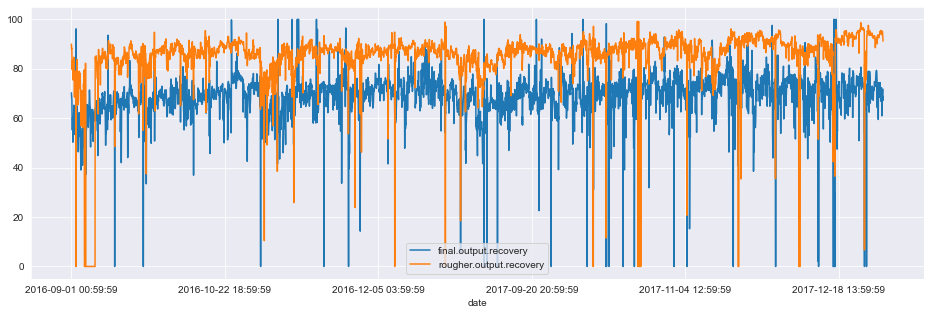

In [11]:
gold_rec_full.loc[gold_rec_test.index,:][['final.output.recovery', 'rougher.output.recovery']].plot(figsize = (16,5))

<AxesSubplot:xlabel='date'>

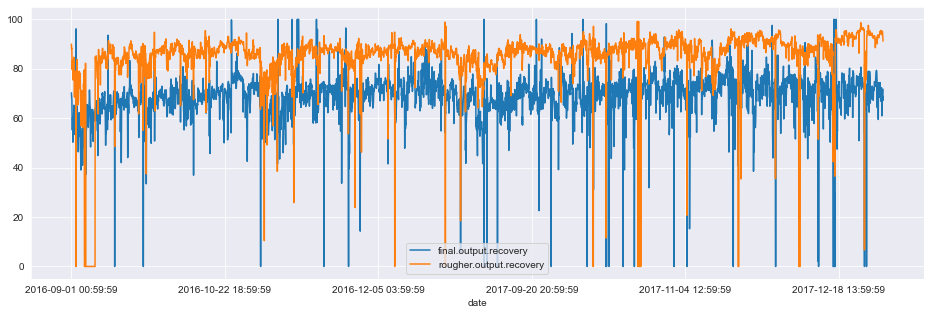

In [12]:
gold_rec_test[['final.output.recovery', 'rougher.output.recovery']].plot(figsize = (16,5))

In [14]:
#Проверка на неравенство значений датасетов
(gold_rec_full.loc[gold_rec_test.index,:][['final.output.recovery', 'rougher.output.recovery']] != 
     gold_rec_test[['final.output.recovery', 'rougher.output.recovery']]).sum()

final.output.recovery      0
rougher.output.recovery    0
dtype: int64

In [15]:
leakage_list.remove('final.output.recovery')
leakage_list.remove('rougher.output.recovery')

In [16]:
# recovery_data_dict['train'] = gold_rec_train.drop(leakage_list, axis = 1) - не использовал, т.к. перезаписывается объект
gold_rec_train.drop(leakage_list, axis = 1, inplace = True)

#### Проверим данные на полные дубликаты

In [17]:
for i in recovery_data_dict:
    print(recovery_data_dict[i].duplicated().sum())

0
0
0


Полных дубликатов нет. Частичные искать не будем, т.к. все равно не ясно что с ними делать при обнаружении

#### Работа с пропусками

Посмотрим на пропуски и их количество

In [18]:
def display_nan(data):
    display(pd.concat([data.isna().sum(), data.isna().mean() * 100], axis = 1)\
    .rename(columns = {0:'nan_sum',1:'nan_percent'}).sort_values('nan_percent', ascending = False).head(10)\
    .style.background_gradient('coolwarm'))

In [19]:
for i in recovery_data_dict:
    print(i)
    display_nan(recovery_data_dict[i])

train


,nan_sum,nan_percent
rougher.state.floatbank10_e_air,436,3.081490
rougher.input.floatbank11_xanthate,428,3.024949
secondary_cleaner.state.floatbank2_a_air,217,1.533677
rougher.input.feed_size,144,1.017740
rougher.input.feed_pb,100,0.706764
primary_cleaner.input.xanthate,100,0.706764
rougher.input.feed_sol,78,0.551276
rougher.input.floatbank11_sulfate,36,0.254435
primary_cleaner.input.depressant,32,0.226164
rougher.input.floatbank10_sulfate,29,0.204961


test


,nan_sum,nan_percent
rougher.input.floatbank11_xanthate,25,0.472590
rougher.input.feed_sol,21,0.396975
secondary_cleaner.state.floatbank3_a_air,9,0.170132
rougher.input.floatbank11_sulfate,8,0.151229
primary_cleaner.input.depressant,5,0.094518
rougher.input.floatbank10_sulfate,5,0.094518
primary_cleaner.input.sulfate,4,0.075614
primary_cleaner.input.xanthate,4,0.075614
rougher.input.feed_rate,3,0.056711
secondary_cleaner.state.floatbank2_a_air,3,0.056711


full


,nan_sum,nan_percent
secondary_cleaner.output.tail_sol,1748,8.992232
rougher.input.floatbank11_xanthate,453,2.330367
rougher.state.floatbank10_e_air,436,2.242914
primary_cleaner.output.concentrate_sol,370,1.903390
secondary_cleaner.state.floatbank2_a_air,220,1.131745
final.output.concentrate_sol,211,1.085447
rougher.input.feed_size,145,0.745923
primary_cleaner.output.concentrate_pb,116,0.596739
primary_cleaner.input.xanthate,104,0.535007
final.output.tail_pb,101,0.519574


В процентном соотношении имеем много пропусков в колонке `secondary_cleaner.output.tail_sol`. Этот признак отсутствует в тестовой выборке, значит в модели не используется - не трогаем

Тут и далее `full` мы не трогаем, только `test` и `train`. 

Пропуски в `test` и `train` просто удалим, т.к. их процент довольно мал


In [20]:
gold_rec_test.dropna(inplace = True)
gold_rec_train.dropna(inplace = True)

In [21]:
print(id(gold_rec_test))
print(id(recovery_data_dict['test']))
print(id(gold_rec_train))
print(id(recovery_data_dict['train']))

2147510578144
2147510578144
2147960336096
2147960336096


**Вывод**
- Целевые признаки добавлены в `test`
- Лишние признаки убраны из `train`
- Пропуски удалены
- Дубликатов не обнаружено

## Анализ данных

### Концентрация металлов на разных стадиях

Посмотрим, как меняются распределения очистки на разных стадиях процесса

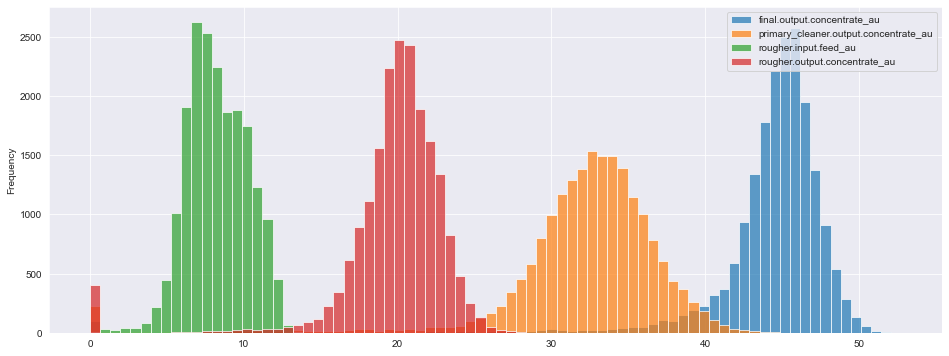

In [22]:
au_list = []
for i in gold_rec_full.columns:
    if 'feed_au' in i or 'concentrate_au' in i:
        au_list.append(i)
gold_rec_full[au_list].plot(kind = 'hist', bins = 80, figsize = (16,6), alpha = 0.7)
plt.show()

Во флотационную установку попадает сырье с низким содержанием золота, после каждого этапа содержание золота увеличивается. Видим выбросы около нуля. Видимо, с данными какой-то непорядок. Нужно будет подумать что с ними делать

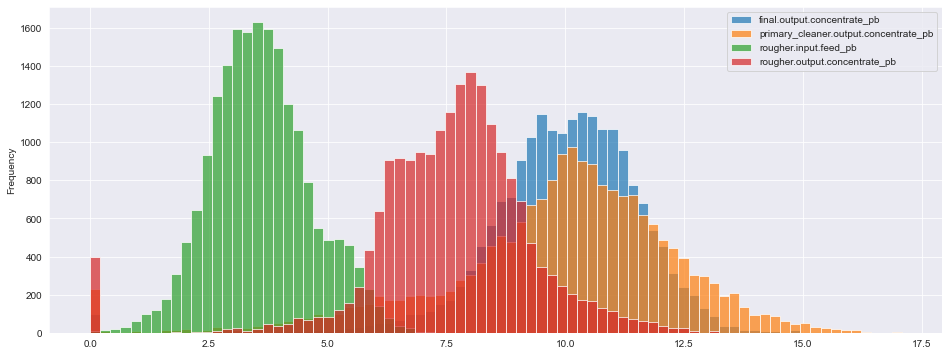

In [23]:
pb_list = []
for i in gold_rec_full.columns:
    if 'feed_pb' in i or 'concentrate_pb' in i:
        pb_list.append(i)
gold_rec_full[pb_list].plot(kind = 'hist', bins = 80, figsize = (16,6), alpha = 0.7)
plt.show()

Свинец проходит очистку хуже золота. Концентрация меняется после флотации и 1 стадии очистки, вторая почти не влияет

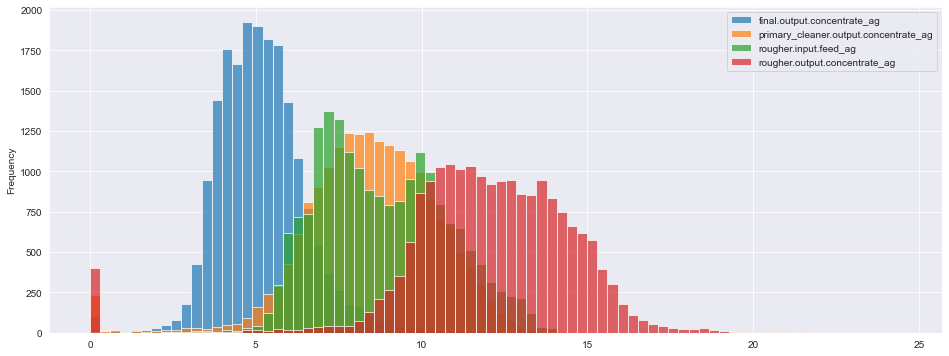

In [24]:
ag_list = []
for i in gold_rec_full.columns:
    if 'feed_ag' in i or 'concentrate_ag' in i:
        ag_list.append(i)
gold_rec_full[ag_list].plot(kind = 'hist', bins = 80, figsize = (16,6), alpha = 0.7)
plt.show()

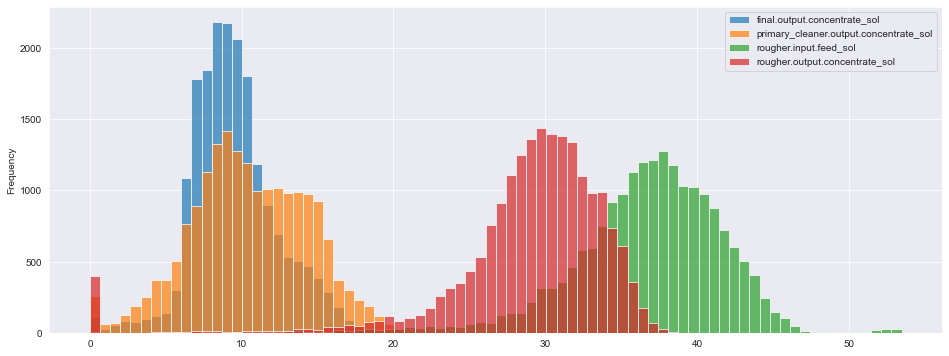

In [25]:
sol_list = []
for i in gold_rec_full.columns:
    if 'feed_sol' in i or 'concentrate_sol' in i:
        sol_list.append(i)
gold_rec_full[sol_list].plot(kind = 'hist', bins = 80, figsize = (16,6), alpha = 0.7)
plt.show()

Концентрация серебра, наоборот, даже уменьшается

**Вывод**

Процесс явно настроен на извлечение золота, остальные металлы уходят в отвальные хвосты

### Размер гранул сырья

Сравним размер гранул сырья на обучающей и тестовой выборках

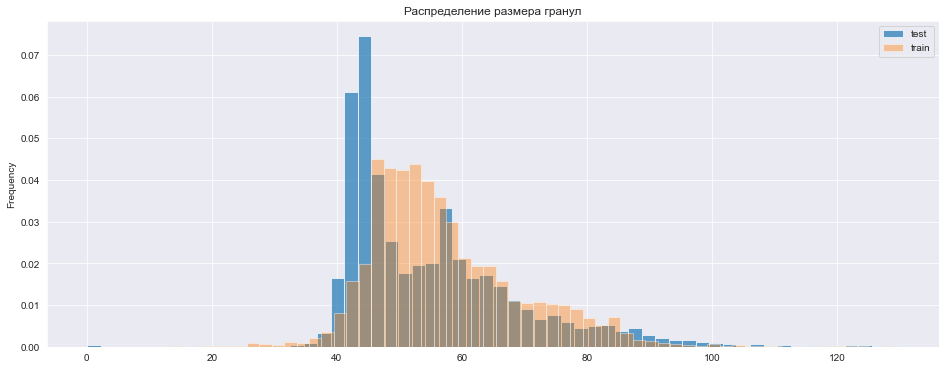

In [26]:
gold_rec_test.loc[gold_rec_test['rougher.input.feed_size'] < 130]['rougher.input.feed_size'] \
.plot(kind = 'hist', bins = 60, figsize = (16,6), alpha = 0.7, density = True)
gold_rec_train.loc[gold_rec_train['rougher.input.feed_size'] < 130]['rougher.input.feed_size'] \
.plot(kind = 'hist', bins = 60, figsize = (16,6), alpha = 0.4, density = True)
plt.title('Распределение размера гранул')
plt.legend(['test', 'train'] )
plt.show()

Оба распределения скошены вправо, моды отличаются, но, в целом, распределения похожи, оставляем как есть. Если работа модели будет сильно искажена, то вернемся сюда

### Суммарные концентрации на разных стадиях

Посчитаем суммарные концентрации сырья на каждой стадии, их у нас 4:
- загрузка
- флотация
- первичная очистка
- вторичная очистка

In [27]:
raw_materials = \
[column for column in gold_rec_full.columns if 'rougher.input.feed' in column and not ('size' in column or 'rate' in column)]

float_output = \
[column for column in gold_rec_full.columns if 'rougher.output.concentrate' in column]

primary_cleaner_output = \
[column for column in gold_rec_full.columns if 'primary_cleaner.output.concentrate' in column]

secondary_cleaner_output = \
[column for column in gold_rec_full.columns if 'final.output.concentrate' in column]

In [28]:
raw_materials

['rougher.input.feed_ag',
 'rougher.input.feed_pb',
 'rougher.input.feed_sol',
 'rougher.input.feed_au']

In [29]:
def concentrate_sum(list):
    sum = gold_rec_full[list].sum(axis = 1)
    return sum

In [30]:
raw_materials_sum = concentrate_sum(raw_materials)
float_output_sum = concentrate_sum(float_output)
primary_cleaner_output_sum = concentrate_sum(primary_cleaner_output)
secondary_cleaner_output_sum = concentrate_sum(secondary_cleaner_output)

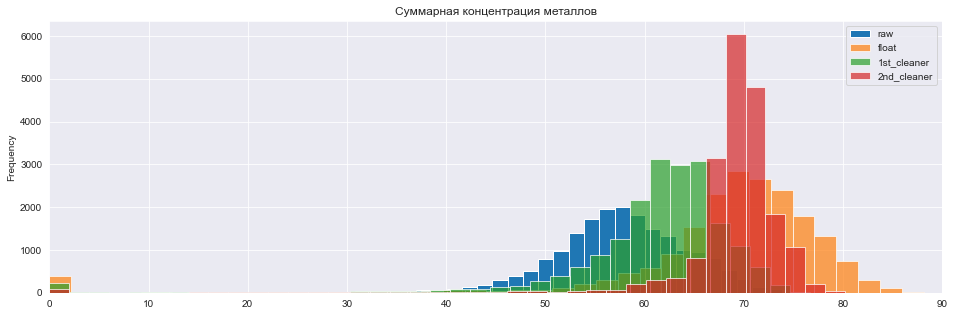

In [31]:
plt.figure(figsize = (16,5))
raw_materials_sum.plot(kind = 'hist', bins = 50, figsize = (16,5))
float_output_sum.plot(kind = 'hist', bins = 40, alpha = 0.7)
primary_cleaner_output_sum.plot(kind = 'hist', bins = 40, alpha = 0.7)
secondary_cleaner_output_sum.plot(kind = 'hist', bins = 40, alpha = 0.7)
plt.legend(['raw','float','1st_cleaner','2nd_cleaner'])
plt.xlim(0,90)
plt.title('Суммарная концентрация металлов')
plt.show()

**Вывод**
Присутствуют выбросы в околонулевых значениях

Суммарные концентрации металлов в сырье меньше, чем после флотации, что логично, ведь на этапе флотации из сырья уходит много пустой породы

После первичной очистки суммарная концентрация уменьшается. Значит, она нацелена на уменьшение долей нецелевых металлов, это подтверждается графиками выше, доли `ag` и `sol` уменьшаются

После вторичной очистки суммарная концентрация растет, обусловлено увеличением концентрации золота (уменьшается `ag`)

## Модель

Моделирование процесса будет включать в себя построение двух отдельных моделей:
- для этапа Флотации
- для этапа очистки

Для оценки качества модели будет использоваться метрика `sMAPE`

Напишем необходимые функции

In [32]:
def smape(target, preds):
    smape = 100 * sum(abs(target - preds) / ((abs(target) + abs(preds)) / 2)) / len(target)
    return smape

In [33]:
def total_smape(smape_float, smape_clean):
    result = 0.25 * smape_float + 0.75 * smape_clean
    return result

In [34]:
from sklearn.metrics import make_scorer
smape_scorer = make_scorer(smape, greater_is_better = False)

Удалим выбросы таргета в трейне (равные нулю)

In [35]:
def gold_zero_outlier(y, x, threshold=3):
    idx = np.where((y == 0))[0]
    mask = np.ones(y.shape[0], dtype=int)
    mask[idx] = -1
    return y[mask == 1], x[mask == 1]

Отберем нужные признаки для train и test для первой модели

In [36]:
float_columns = [col for col in gold_rec_test.columns if 'rougher' in col]
clean_columns = [col for col in gold_rec_test.columns if 'cleaner' in col or 'final' in col]

In [37]:
gold_rec_float_test = gold_rec_test[float_columns]
gold_rec_float_train = gold_rec_train[float_columns]
gold_rec_clean_test = gold_rec_test[clean_columns]
gold_rec_clean_train = gold_rec_train[clean_columns]

In [38]:
x_train = gold_rec_float_train.drop('rougher.output.recovery', axis = 1)
x_test = gold_rec_float_test.drop('rougher.output.recovery', axis = 1)
y_train = gold_rec_float_train['rougher.output.recovery']
y_test = gold_rec_float_test['rougher.output.recovery']
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(12679, 22)
(5229, 22)
(12679,)
(5229,)


In [39]:
y_train, x_train = gold_zero_outlier(y_train, x_train)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(12469, 22)
(5229, 22)
(12469,)
(5229,)


Удалили из трейна все выбросы, тест не трогаем

Категориальных данных у нас нет, кодировать нечего

Шаги пайплайна:
- Стандартизация - StandardScaler
- Проверка на корреляцию и отбор признаков - DropCorrelatedFeatures - так модель лучше обучится и не будет "отвлекаться" на лишние признаки. Да и время обучения сократится в разы
- Работа с выбросами - KNN - удалим выбросы из фичей
- Подбор модели с помощью GridSearchCV


In [40]:
pipeline = Pipeline(
    [
        ('scaler', StandardScaler()),
        ('drop_correlations', DropCorrelatedFeatures())
    ]
)

In [42]:
pipeline.steps.append(('regressor', DummyRegressor()))

In [43]:
pipeline.fit(x_train,y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('drop_correlations', DropCorrelatedFeatures()),
                ('regressor', DummyRegressor())])

In [44]:
preds_dummy_float = pipeline.predict(x_test)
smape(y_test, preds_dummy_float)

8.965560323174397

Дамми модель показывает smape 8.97. Посмотрим чего удастся достичь с помощью обученных моделей Линейной регрессии, Случайного леса и Решающего дерева. 

Перебирать параметры модели будем с помощью GridSearchCV

In [45]:
params = [
    {
    'regressor': [LinearRegression()],
    'regressor__fit_intercept': [True, False]    
    },
        
    {
    'regressor': [RandomForestRegressor(random_state = 12345)],
    'regressor__n_estimators': [10,20,50,90,130,150],
    'regressor__max_depth': range(1,10)
    },
    
    {
    'regressor': [DecisionTreeRegressor(random_state = 12345)],
    'regressor__min_samples_leaf': [1,2,3],
    'regressor__max_depth': range(1,15)
    }
]

grid_model_float = GridSearchCV(pipeline, params, cv = 5, scoring = smape_scorer, n_jobs = -1)

In [46]:
%%time

grid_model_float.fit(x_train,y_train)

CPU times: total: 2.64 s
Wall time: 1min 35s


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('drop_correlations',
                                        DropCorrelatedFeatures()),
                                       ('regressor', DummyRegressor())]),
             n_jobs=-1,
             param_grid=[{'regressor': [LinearRegression()],
                          'regressor__fit_intercept': [True, False]},
                         {'regressor': [RandomForestRegressor(random_state=12345)],
                          'regressor__max_depth': range(1, 10),
                          'regressor__n_estimators': [10, 20, 50, 90, 130,
                                                      150]},
                         {'regressor': [DecisionTreeRegressor(random_state=12345)],
                          'regressor__max_depth': range(1, 15),
                          'regressor__min_samples_leaf': [1, 2, 3]}],
             scoring=make_scorer(smape, greater_is_better=False))

In [47]:
print(grid_model_float.best_params_)
print(grid_model_float.best_score_)

{'regressor': LinearRegression(), 'regressor__fit_intercept': True}
-5.941519135645221


лучший результат у линейной регрессии, smape = 5.94

In [48]:
preds = grid_model_float.predict(x_test)
smape(y_test, preds)

8.043240455768107

**Вывод**

Лучшей моделью оказалась линейная регрессия. Smape на тестовой выборке 8.04. Различие со скорингом на валидации объясняется наличием выбросов в тестовой выборке. На то она и тестовая

Стоило ли удалять выбросы в тесте - спорный момент:
- С одной стороны, тестовые данные должны быть похожи на данные в продакшене
- С другой, мы с большой долей вероятности можем утверждать, что нулевая концентрация золота - это ошибка измерения или выгрузки данных и нужно обратить внимание заказчика на этот момент

Составим модель для очистки

Выберем нужные фичи

In [49]:
x_train_2 = gold_rec_clean_train.drop('final.output.recovery', axis = 1)
x_test_2 = gold_rec_clean_test.drop('final.output.recovery', axis = 1)
y_train_2 = gold_rec_clean_train['final.output.recovery']
y_test_2 = gold_rec_clean_test['final.output.recovery']
print(x_train_2.shape)
print(x_test_2.shape)
print(y_train_2.shape)
print(y_test_2.shape)

(12679, 30)
(5229, 30)
(12679,)
(5229,)


Удалим выбросы по таргету

In [50]:
y_train_2, x_train_2 = gold_zero_outlier(y_train_2, x_train_2)
print(x_train_2.shape)
print(x_test_2.shape)
print(y_train_2.shape)
print(y_test_2.shape)

(12643, 30)
(5229, 30)
(12643,)
(5229,)


переберем параметры для моделей

In [51]:
pipeline_2 = Pipeline(
    [
        ('scaler', StandardScaler()),
        ('drop_correlations', DropCorrelatedFeatures())
    ]
)

In [52]:
pipeline_2.steps.append(('regressor', DummyRegressor()))

In [53]:
pipeline_2.fit(x_train_2,y_train_2)

Pipeline(steps=[('scaler', StandardScaler()),
                ('drop_correlations', DropCorrelatedFeatures()),
                ('regressor', DummyRegressor())])

In [54]:
preds_dummy_clean = pipeline_2.predict(x_test_2)
smape(y_test_2, preds_dummy_clean)

9.552398344041602

smape у дамми модели молучилось 9.55

Проверим модели линейной регрессии, случайного леса и решающего дерева.
Список параметров у нас уже есть

In [55]:
grid_model_clean = GridSearchCV(pipeline_2, params, cv = 5, scoring = smape_scorer, n_jobs = -1)

In [56]:
%%time

grid_model_clean.fit(x_train_2,y_train_2)

CPU times: total: 2.72 s
Wall time: 2min 44s


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('drop_correlations',
                                        DropCorrelatedFeatures()),
                                       ('regressor', DummyRegressor())]),
             n_jobs=-1,
             param_grid=[{'regressor': [LinearRegression()],
                          'regressor__fit_intercept': [True, False]},
                         {'regressor': [RandomForestRegressor(random_state=12345)],
                          'regressor__max_depth': range(1, 10),
                          'regressor__n_estimators': [10, 20, 50, 90, 130,
                                                      150]},
                         {'regressor': [DecisionTreeRegressor(random_state=12345)],
                          'regressor__max_depth': range(1, 15),
                          'regressor__min_samples_leaf': [1, 2, 3]}],
             scoring=make_scorer(smape, greater_is_better=False))

Обучение заняло чуть более 3 минут

In [57]:
print(grid_model_clean.best_params_)
print(grid_model_clean.best_score_)

{'regressor': LinearRegression(), 'regressor__fit_intercept': True}
-9.192378729541216


Снова лучшая метрика у линейной регрессии, smape 8.25, Проверим на тесте

In [58]:
preds_2 = grid_model_clean.predict(x_test_2)
smape(y_test_2, preds_2)

9.309686940448685

smape = 9.31, снова объясняется выбросами в тестовой выборке, которые мы не удаляли

**Вывод**

Лучшей моделью оказалась линейная регрессия
Модель предсказывает лучше случайной

In [59]:
total_smape(smape(y_test, preds), smape(y_test_2, preds_2))

8.99307531927854

Итоговый smape 2 моделей 8.99

**Вывод**

- Целью работы являлась разработка модели, которая предсказывала бы содержание золота в конечном продукте в зависимости от входных параметров. Таким образом, модель уберегла бы производство от запуска с неподходящими бизнесу метриками

- Были предобработаны данные, выделены нужные колонки для предсказаний (параметры, имеющиеся до начала процесса)

- Было исследование изменение концентраций металлов на разных этапах 

- Были выделены 2 этапа получения конечного продукта: флотация и очистка. Для каждой из них подготовлена предсказательная модель

- Были исследованы модели Случайного леса, Линейной регрессии, Решающего дерева

лучшей в обоих случаях оказалась Линейная регрессия, итоговая sMAPE которой равна 8.99

- На результат сильно повлияло наличие выбросов в тестовой метрике. Заказчику рекомендуется обратить внимание на измерительные приборы, которые в некоторыхз случаях показывают наличие золота в конечном продукте равной нулю